In [1]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor


In [2]:

# Load dataset
df = pd.read_csv("E:/vscode/Household_power/env/Scripts/household_power_consumption.txt", sep=';', 
                 low_memory=False, na_values=['?'], parse_dates={'Datetime': ['Date', 'Time']},
                 infer_datetime_format=True)

# Display basic info
print(df.info())
print(df.describe())
df.head()


C:\Users\R.v.a\AppData\Local\Temp\ipykernel_8956\2634113122.py:2: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df = pd.read_csv("E:/vscode/Household_power/env/Scripts/household_power_consumption.txt", sep=';',
C:\Users\R.v.a\AppData\Local\Temp\ipykernel_8956\2634113122.py:2: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv("E:/vscode/Household_power/env/Scripts/household_power_consumption.txt", sep=';',
C:\Users\R.v.a\AppData\Local\Temp\ipykernel_8956\2634113122.py:2: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 8 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Datetime               datetime64[ns]
 1   Global_active_power    float64       
 2   Global_reactive_power  float64       
 3   Voltage                float64       
 4   Global_intensity       float64       
 5   Sub_metering_1         float64       
 6   Sub_metering_2         float64       
 7   Sub_metering_3         float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 126.7 MB
None
                            Datetime  Global_active_power  \
count                        2075259         2.049280e+06   
mean   2008-12-06 07:12:59.999994112         1.091615e+00   
min              2006-12-16 17:24:00         7.600000e-02   
25%              2007-12-12 00:18:30         3.080000e-01   
50%              2008-12-06 07:13:00         6.020000e-01   
75%              2009-12-0

,Datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


Datetime                     0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64


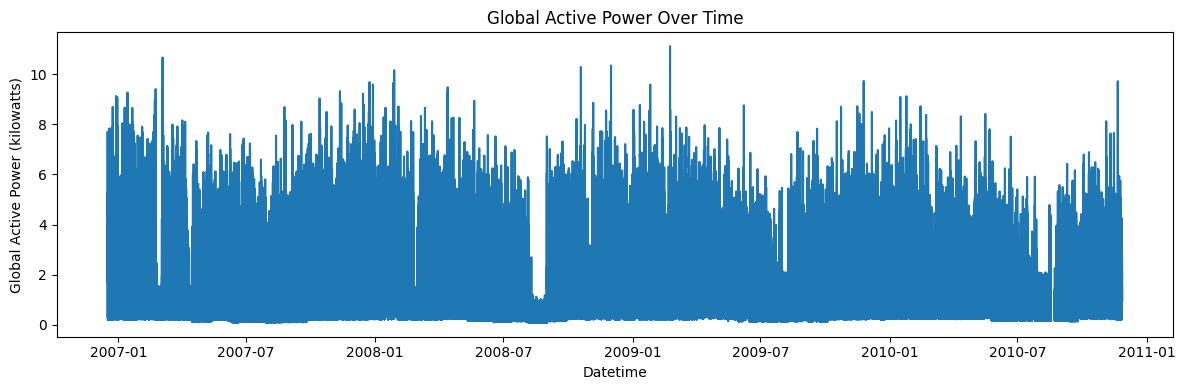

In [3]:
# Check for missing values
print(df.isnull().sum())

# Plot Global Active Power over time
plt.figure(figsize=(12, 4))
plt.plot(df['Datetime'], df['Global_active_power'])
plt.title('Global Active Power Over Time')
plt.xlabel('Datetime')
plt.ylabel('Global Active Power (kilowatts)')
plt.tight_layout()
plt.show()


In [4]:
# Drop missing values
df.dropna(inplace=True)

# Convert to numeric
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'])

# Extract time-based features
df['Hour'] = df['Datetime'].dt.hour
df['Day'] = df['Datetime'].dt.day
df['Month'] = df['Datetime'].dt.month
df['Weekday'] = df['Datetime'].dt.weekday

# Feature: Rolling mean
df['Rolling_mean'] = df['Global_active_power'].rolling(window=3).mean().fillna(method='bfill')

C:\Users\R.v.a\AppData\Local\Temp\ipykernel_8956\2660582970.py:14: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Rolling_mean'] = df['Global_active_power'].rolling(window=3).mean().fillna(method='bfill')


In [5]:
# Feature: Is Peak Hour (6PM–9PM)
df['Is_Peak'] = df['Hour'].apply(lambda x: 1 if 18 <= x <= 21 else 0)

# Feature: Is Weekend
df['Is_Weekend'] = df['Weekday'].apply(lambda x: 1 if x >= 5 else 0)

# Lag Feature
df['Lag_1hr'] = df['Global_active_power'].shift(1)

# Remove any new missing values introduced by rolling and lag
df.dropna(inplace=True)

# ✅ Define X and y after all features are added
X = df.drop(columns=['Global_active_power', 'Datetime'])
y = df['Global_active_power']

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [7]:
# Models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100),
    'KNN': KNeighborsRegressor(n_neighbors=5),
    'Decision Tree': DecisionTreeRegressor(max_depth=5),
    'MLP Regressor': MLPRegressor(hidden_layer_sizes=(100,), max_iter=500)
}

results = []

# Train and evaluate
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    preds = model.predict(X_test_scaled)

    mae = mean_absolute_error(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    r2 = r2_score(y_test, preds)

    results.append((name, mae, rmse, r2))

results_df = pd.DataFrame(results, columns=["Model", "MAE", "RMSE", "R²"])
print(results_df.sort_values(by="RMSE"))

               Model       MAE      RMSE        R²
1      Random Forest  0.009952  0.022190  0.999563
5      MLP Regressor  0.015855  0.025210  0.999435
2  Gradient Boosting  0.018852  0.031694  0.999108
0  Linear Regression  0.025085  0.039485  0.998615
4      Decision Tree  0.040637  0.063171  0.996455
3                KNN  0.037426  0.087303  0.993230


C:\Users\R.v.a\AppData\Local\Temp\ipykernel_8956\997445171.py:9: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
e:\vscode\Household_power\env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


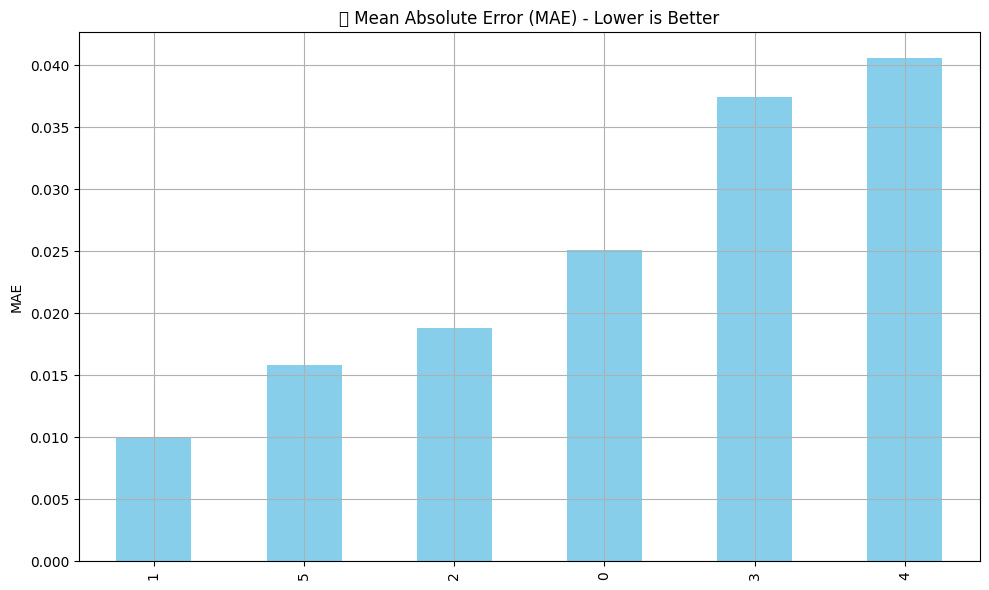

In [9]:
import matplotlib.pyplot as plt

# 1. MAE Bar Chart
plt.figure(figsize=(10,6))
results_df['MAE'].sort_values().plot(kind='bar', color='skyblue')
plt.title("📉 Mean Absolute Error (MAE) - Lower is Better")
plt.ylabel("MAE")
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\SHREE\AppData\Local\Temp\ipykernel_13072\3816246615.py:7: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\SHREE\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


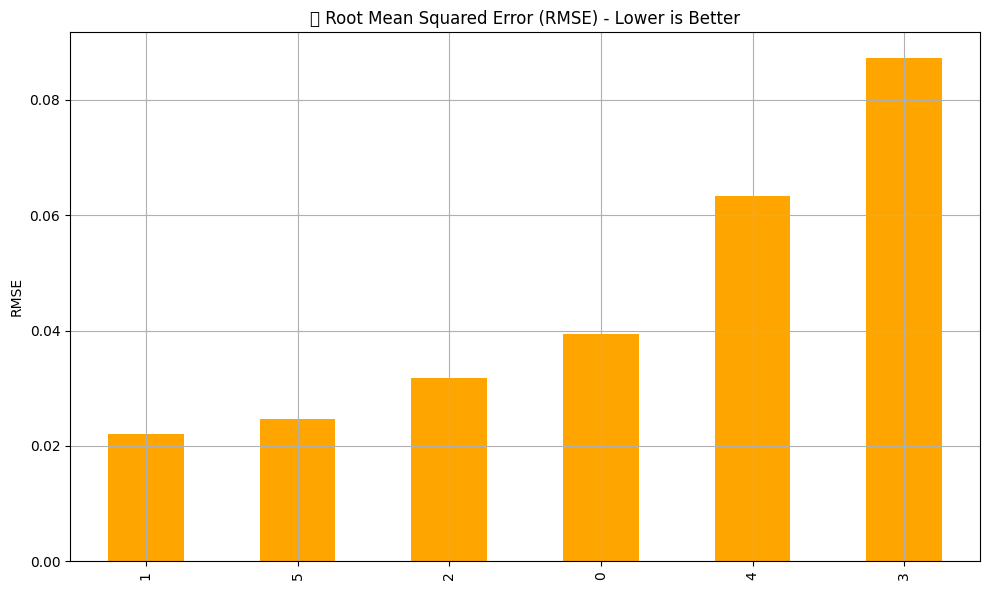

In [34]:
# 2. RMSE Bar Chart
plt.figure(figsize=(10,6))
results_df['RMSE'].sort_values().plot(kind='bar', color='orange')
plt.title("📉 Root Mean Squared Error (RMSE) - Lower is Better")
plt.ylabel("RMSE")
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\R.v.a\AppData\Local\Temp\ipykernel_8956\2408505610.py:7: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
e:\vscode\Household_power\env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


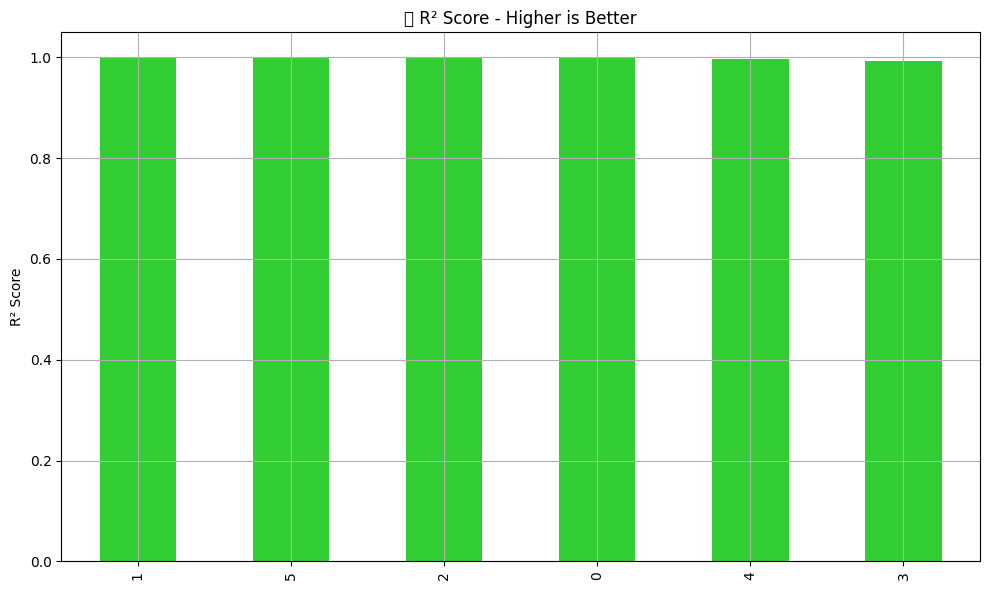

In [10]:
# 3. R² Score Bar Chart
plt.figure(figsize=(10,6))
results_df['R²'].sort_values(ascending=False).plot(kind='bar', color='limegreen')
plt.title("📈 R² Score - Higher is Better")
plt.ylabel("R² Score")
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\R.v.a\AppData\Local\Temp\ipykernel_8956\2111849169.py:25: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.95])
C:\Users\R.v.a\AppData\Local\Temp\ipykernel_8956\2111849169.py:25: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.95])
C:\Users\R.v.a\AppData\Local\Temp\ipykernel_8956\2111849169.py:25: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.95])
e:\vscode\Household_power\env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
e:\vscode\Household_power\env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


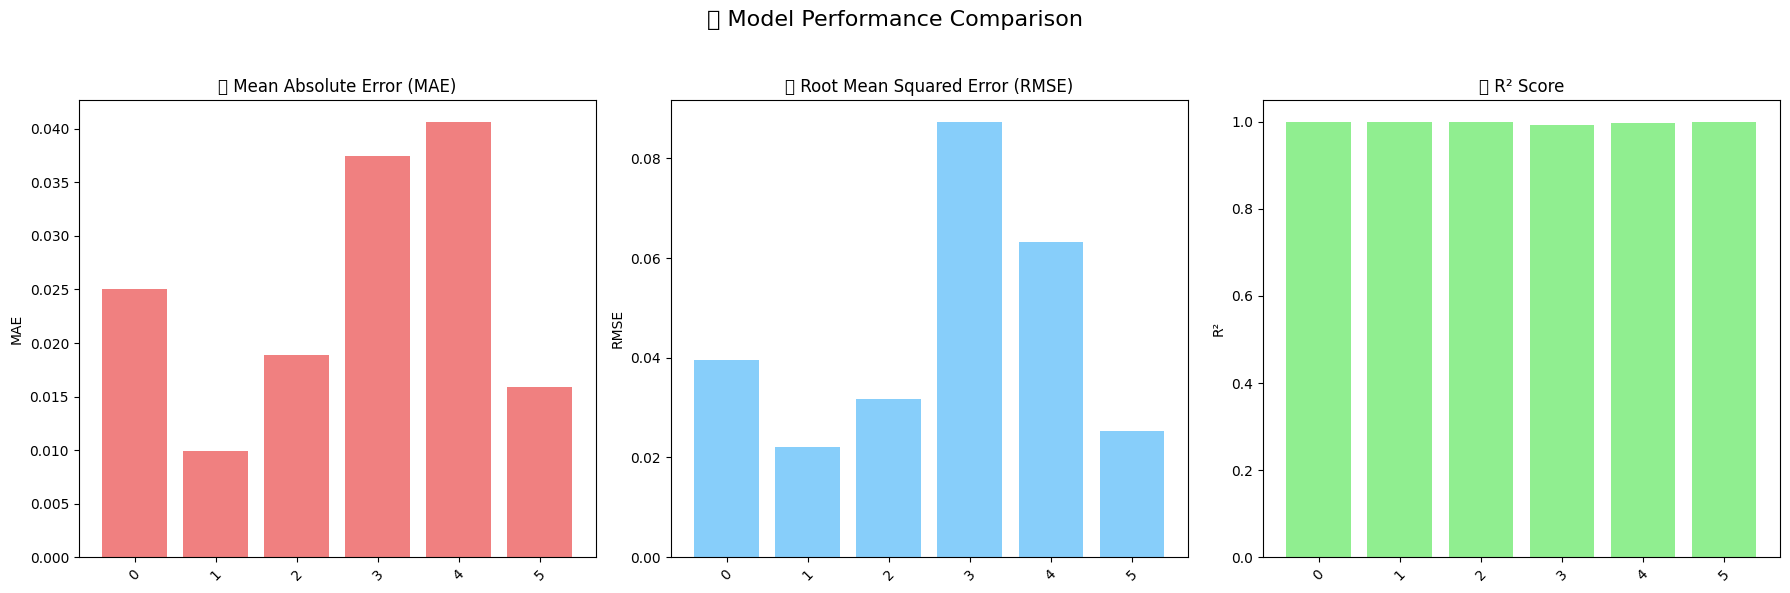

In [11]:
import matplotlib.pyplot as plt

# Create a figure with 3 subplots side by side
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# 1. MAE
axs[0].bar(results_df.index, results_df['MAE'], color='lightcoral')
axs[0].set_title('📉 Mean Absolute Error (MAE)')
axs[0].set_ylabel('MAE')
axs[0].tick_params(axis='x', rotation=45)

# 2. RMSE
axs[1].bar(results_df.index, results_df['RMSE'], color='lightskyblue')
axs[1].set_title('📉 Root Mean Squared Error (RMSE)')
axs[1].set_ylabel('RMSE')
axs[1].tick_params(axis='x', rotation=45)

# 3. R² Score
axs[2].bar(results_df.index, results_df['R²'], color='lightgreen')
axs[2].set_title('📈 R² Score')
axs[2].set_ylabel('R²')
axs[2].tick_params(axis='x', rotation=45)

plt.suptitle("📊 Model Performance Comparison", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


C:\Users\R.v.a\AppData\Local\Temp\ipykernel_8956\410616114.py:11: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
e:\vscode\Household_power\env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


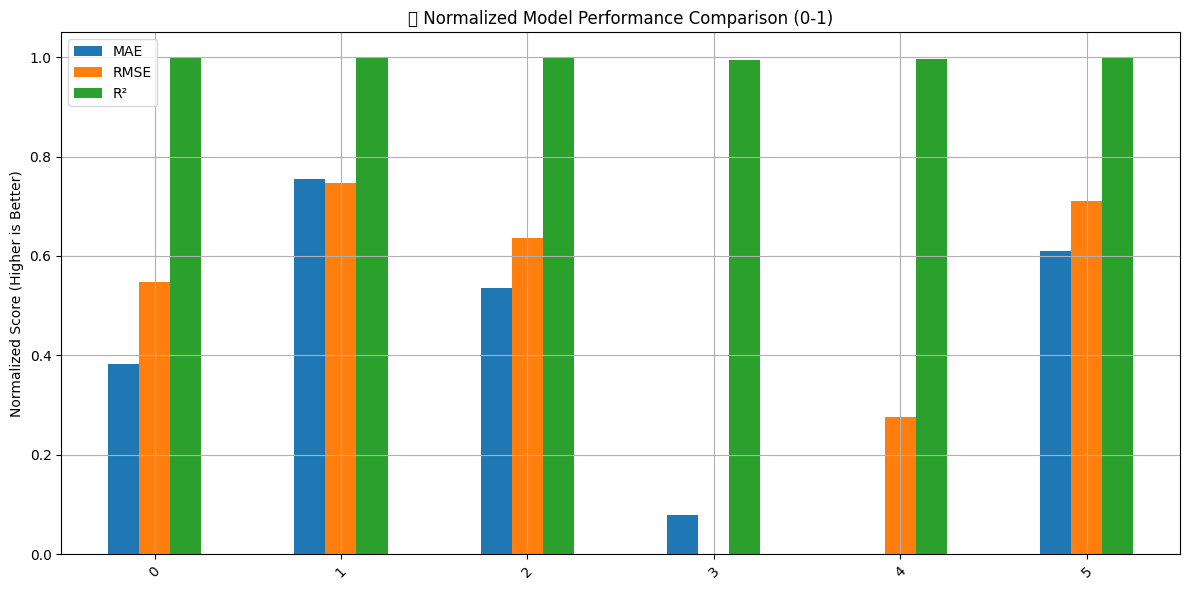

In [12]:
# Normalize the metrics for fair comparison (all range between 0 and 1)
normalized_df = results_df.copy()
normalized_df['MAE'] = 1 - (normalized_df['MAE'] / results_df['MAE'].max())  # invert because lower is better
normalized_df['RMSE'] = 1 - (normalized_df['RMSE'] / results_df['RMSE'].max())
normalized_df['R²'] = results_df['R²'] / results_df['R²'].max()  # already higher is better

normalized_df.plot(kind='bar', figsize=(12, 6), title='📊 Normalized Model Performance Comparison (0-1)')
plt.ylabel("Normalized Score (Higher is Better)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\R.v.a\AppData\Local\Temp\ipykernel_8956\3583677216.py:10: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


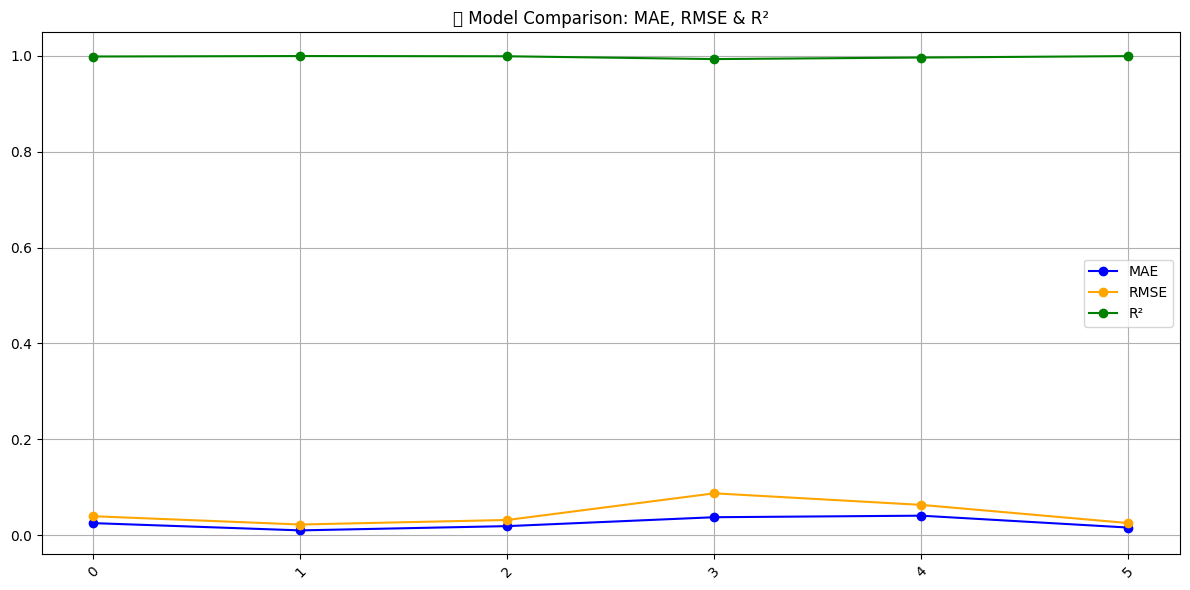

In [13]:
# 📊 4. Combined Line Chart
plt.figure(figsize=(12,6))
plt.plot(results_df.index, results_df['MAE'], marker='o', label='MAE', color='blue')
plt.plot(results_df.index, results_df['RMSE'], marker='o', label='RMSE', color='orange')
plt.plot(results_df.index, results_df['R²'], marker='o', label='R²', color='green')
plt.title("📊 Model Comparison: MAE, RMSE & R²")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


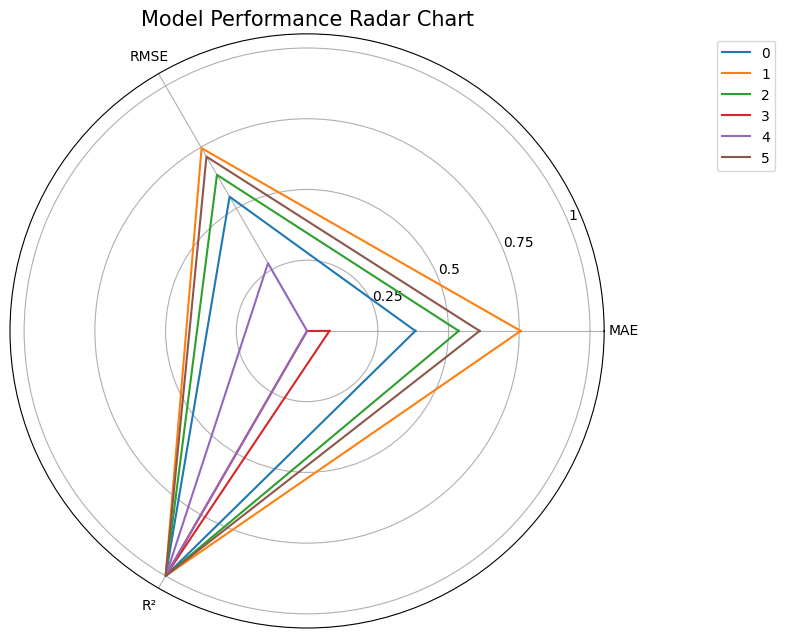

In [14]:
from math import pi

# Normalize scores between 0 and 1 (best = 1)
normalized_df = results_df.copy()
normalized_df['MAE'] = 1 - (normalized_df['MAE'] / normalized_df['MAE'].max())
normalized_df['RMSE'] = 1 - (normalized_df['RMSE'] / normalized_df['RMSE'].max())
normalized_df['R²'] = normalized_df['R²'] / normalized_df['R²'].max()

# Create radar chart for each model
categories = ['MAE', 'RMSE', 'R²']
N = len(categories)

plt.figure(figsize=(8, 8))
for model in normalized_df.index:
    values = normalized_df.loc[model, categories].tolist()
    values += values[:1]  # Close the circle
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
    plt.polar(angles, values, label=model)

plt.title("Model Performance Radar Chart", size=15)
plt.xticks([n / float(N) * 2 * pi for n in range(N)], categories)
plt.yticks([0.25, 0.5, 0.75, 1], ["0.25", "0.5", "0.75", "1"])
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.tight_layout()
plt.show()


In [15]:
# Identify best performing model
best_model = results_df['R²'].idxmax()
print(f"✅ The best performing model is: '{best_model}' with R² = {results_df.loc[best_model, 'R²']:.4f}")
results_df.sort_values("R²", ascending=False)


✅ The best performing model is: '1' with R² = 0.9996


,Model,MAE,RMSE,R²
1,Random Forest,0.009952,0.022190,0.999563
5,MLP Regressor,0.015855,0.025210,0.999435
2,Gradient Boosting,0.018852,0.031694,0.999108
0,Linear Regression,0.025085,0.039485,0.998615
4,Decision Tree,0.040637,0.063171,0.996455
3,KNN,0.037426,0.087303,0.993230


C:\Users\R.v.a\AppData\Local\Temp\ipykernel_8956\2765816029.py:22: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
e:\vscode\Household_power\env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


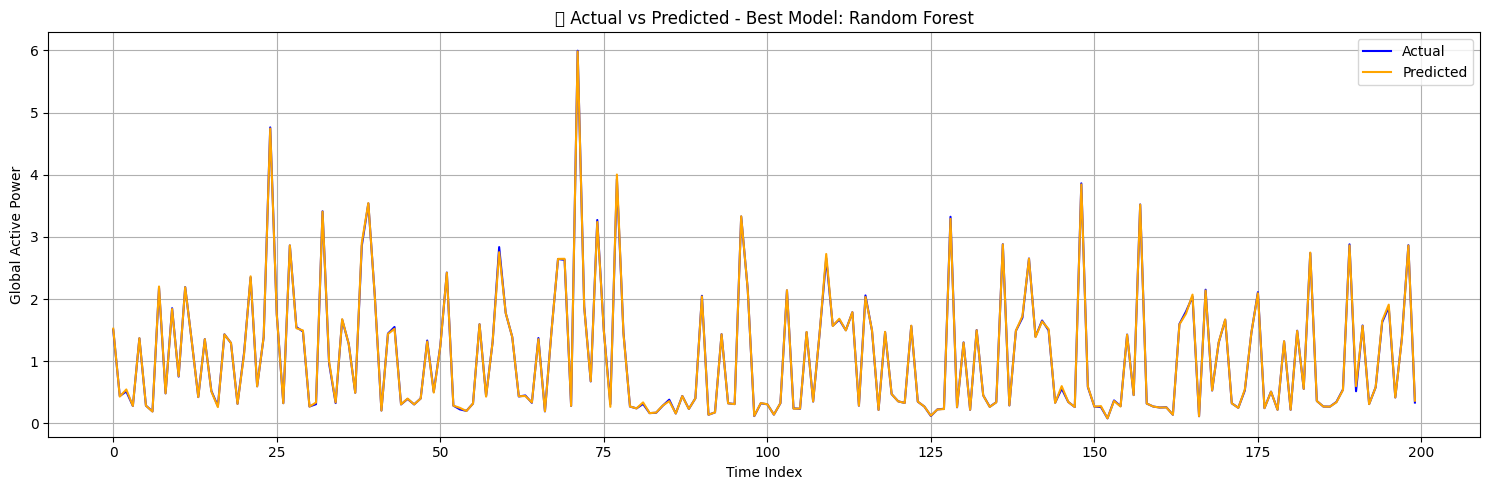

In [16]:
# Get model name from the index
best_model_index = results_df['R²'].idxmax()
best_model_name = results_df.loc[best_model_index, 'Model']  # Assuming 'Model' column has names like 'Random Forest'

# Now retrieve the trained model from your models dictionary
best_model = models[best_model_name]

# Predict and plot
y_pred = best_model.predict(X_test_scaled)

# Plot Actual vs Predicted
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
plt.plot(y_test.values[:200], label='Actual', color='blue')
plt.plot(y_pred[:200], label='Predicted', color='orange')
plt.title(f"📈 Actual vs Predicted - Best Model: {best_model_name}")
plt.xlabel("Time Index")
plt.ylabel("Global Active Power")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\R.v.a\AppData\Local\Temp\ipykernel_8956\2412707470.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=X.columns, palette='coolwarm')
C:\Users\R.v.a\AppData\Local\Temp\ipykernel_8956\2412707470.py:6: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
e:\vscode\Household_power\env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


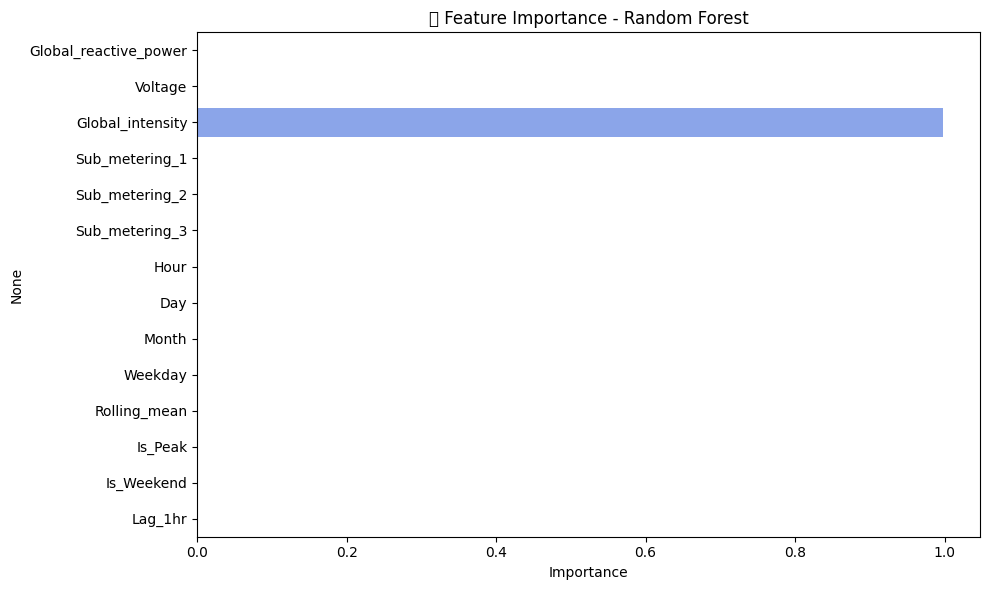

In [17]:
importances = best_model.feature_importances_
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=X.columns, palette='coolwarm')
plt.title("📊 Feature Importance - Random Forest")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()


C:\Users\R.v.a\AppData\Local\Temp\ipykernel_8956\1187253726.py:14: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
e:\vscode\Household_power\env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


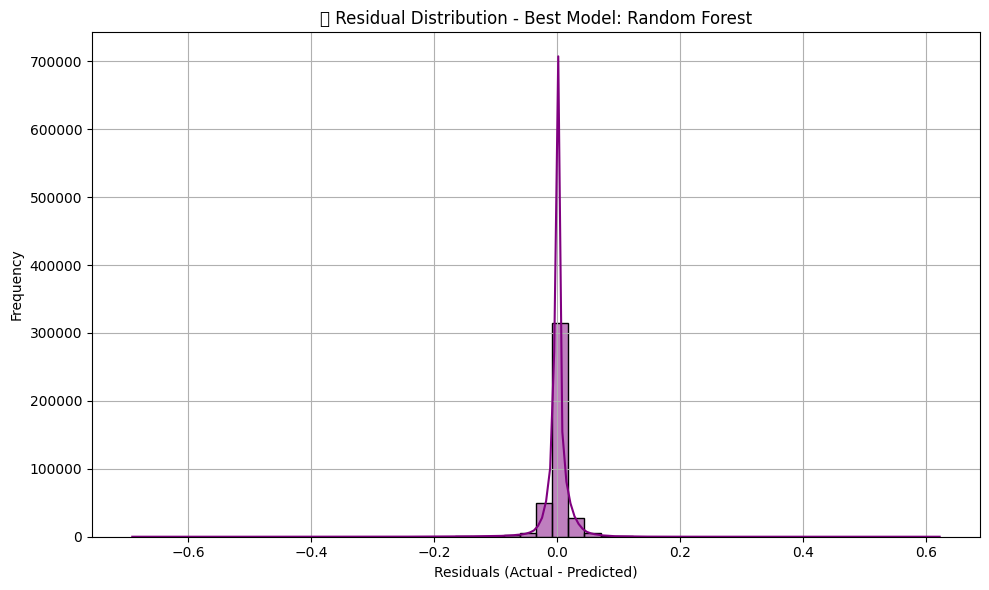

In [18]:
# Predict using the best model
y_pred = best_model.predict(X_test_scaled)

# Calculate residuals (errors)
residuals = y_test - y_pred

# Plot residual distribution
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=50, kde=True, color='purple')
plt.title(f"📉 Residual Distribution - Best Model: {best_model_name}")
plt.xlabel("Residuals (Actual - Predicted)")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\R.v.a\AppData\Local\Temp\ipykernel_8956\1385366699.py:13: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
e:\vscode\Household_power\env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


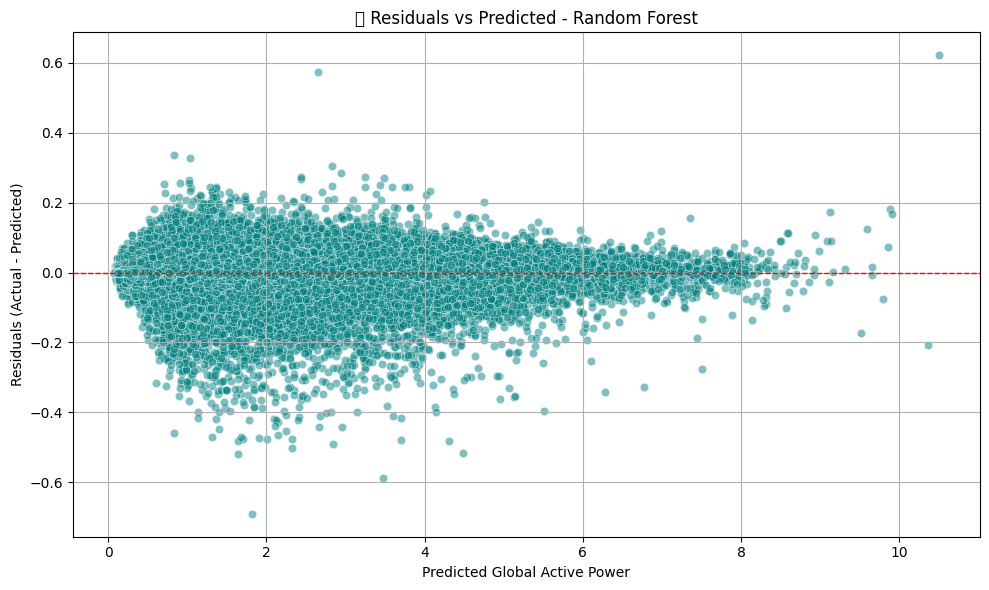

In [19]:
# Predict using best model
y_pred = best_model.predict(X_test_scaled)
residuals = y_test - y_pred

# Plot residuals vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.5, color='teal')
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.title(f"📈 Residuals vs Predicted - {best_model_name}")
plt.xlabel("Predicted Global Active Power")
plt.ylabel("Residuals (Actual - Predicted)")
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\R.v.a\AppData\Local\Temp\ipykernel_8956\2700858971.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=best_model.feature_importances_, y=X.columns, ax=axs[1, 1], palette='viridis')
C:\Users\R.v.a\AppData\Local\Temp\ipykernel_8956\2700858971.py:45: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.96])
C:\Users\R.v.a\AppData\Local\Temp\ipykernel_8956\2700858971.py:45: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.96])
C:\Users\R.v.a\AppData\Local\Temp\ipykernel_8956\2700858971.py:45: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.96])
C:\Users\R.v.a\AppData\Local\Temp\ipykernel_8956\2700858971.py:45: User

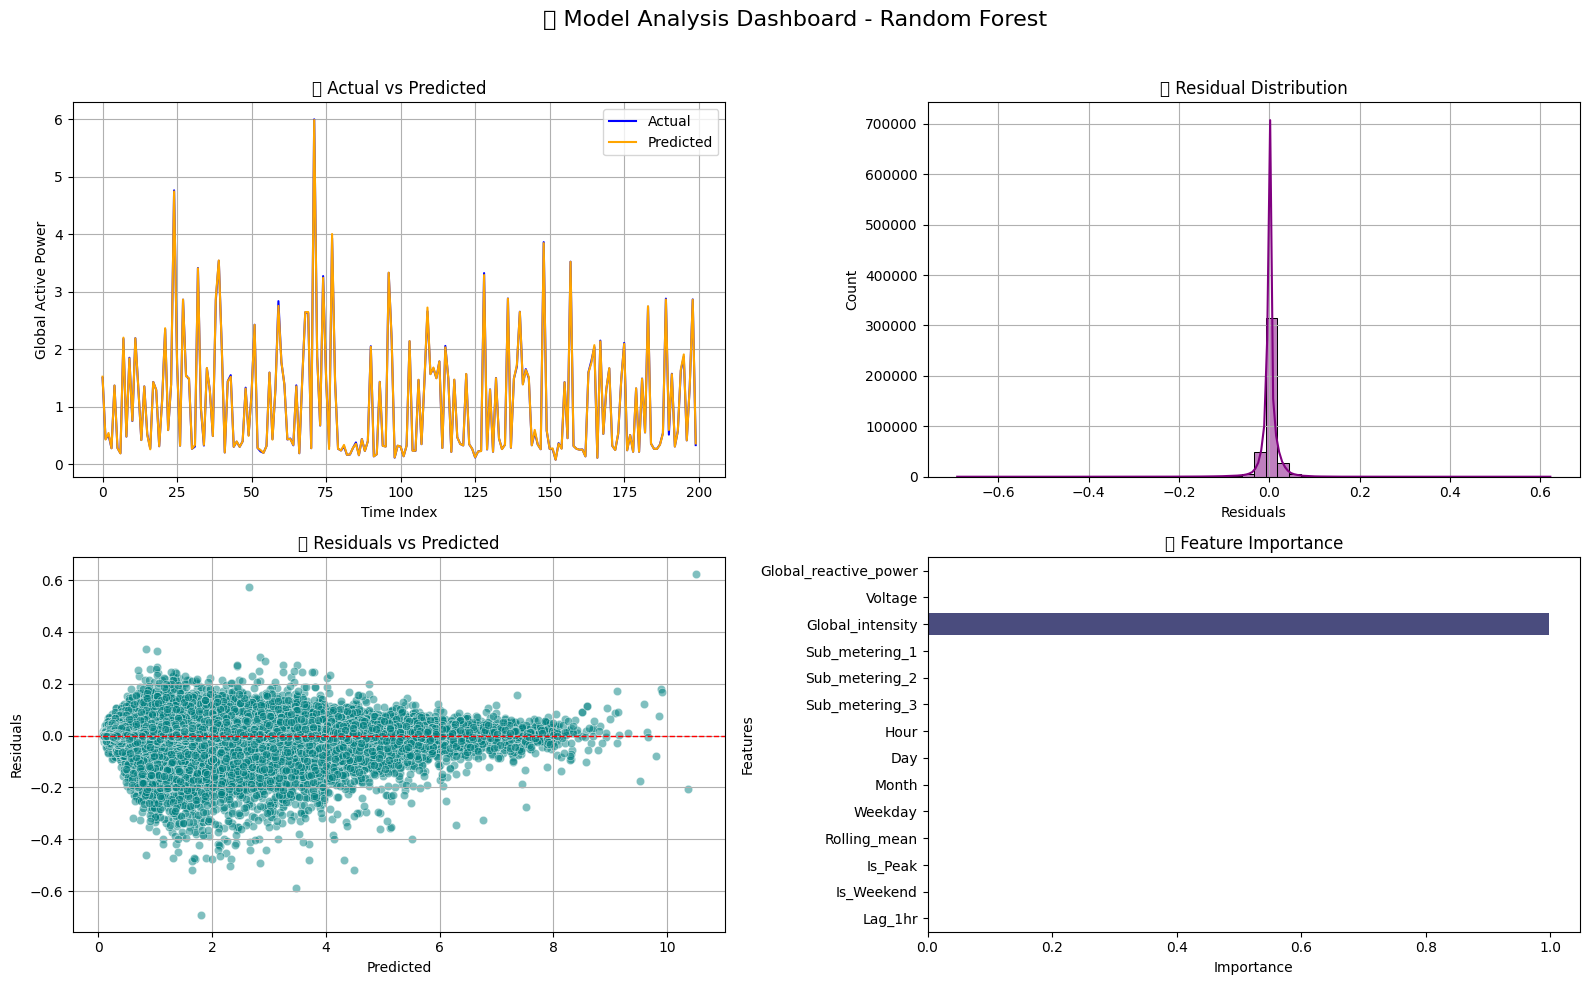

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Predictions & residuals
y_pred = best_model.predict(X_test_scaled)
residuals = y_test - y_pred

# Setup dashboard layout
fig, axs = plt.subplots(2, 2, figsize=(16, 10))

# 1. Actual vs Predicted (first 200)
axs[0, 0].plot(y_test.values[:200], label='Actual', color='blue')
axs[0, 0].plot(y_pred[:200], label='Predicted', color='orange')
axs[0, 0].set_title("📈 Actual vs Predicted")
axs[0, 0].set_xlabel("Time Index")
axs[0, 0].set_ylabel("Global Active Power")
axs[0, 0].legend()
axs[0, 0].grid(True)

# 2. Residual Distribution
sns.histplot(residuals, bins=50, kde=True, color='purple', ax=axs[0, 1])
axs[0, 1].set_title("📉 Residual Distribution")
axs[0, 1].set_xlabel("Residuals")
axs[0, 1].grid(True)

# 3. Residuals vs Predicted
sns.scatterplot(x=y_pred, y=residuals, alpha=0.5, color='teal', ax=axs[1, 0])
axs[1, 0].axhline(0, color='red', linestyle='--', linewidth=1)
axs[1, 0].set_title("📈 Residuals vs Predicted")
axs[1, 0].set_xlabel("Predicted")
axs[1, 0].set_ylabel("Residuals")
axs[1, 0].grid(True)

# 4. Feature Importance (if available)
if hasattr(best_model, "feature_importances_"):
    sns.barplot(x=best_model.feature_importances_, y=X.columns, ax=axs[1, 1], palette='viridis')
    axs[1, 1].set_title("📊 Feature Importance")
    axs[1, 1].set_xlabel("Importance")
    axs[1, 1].set_ylabel("Features")
else:
    axs[1, 1].axis('off')
    axs[1, 1].text(0.5, 0.5, "Feature importance\nnot available", ha='center', va='center', fontsize=12)

plt.suptitle(f"🧠 Model Analysis Dashboard - {best_model_name}", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [21]:
import psutil
import os

process = psutil.Process(os.getpid())
ram_usage_mb = process.memory_info().rss / 1024 / 1024  # in MB
print(f"Current RAM usage: {ram_usage_mb:.2f} MB")

Current RAM usage: 510.29 MB


In [22]:
mem = psutil.virtual_memory()
print(f"Total RAM: {mem.total / (1024**3):.2f} GB")
print(f"Used RAM: {mem.used / (1024**3):.2f} GB")
print(f"Free RAM: {mem.available / (1024**3):.2f} GB")


Total RAM: 7.75 GB
Used RAM: 4.32 GB
Free RAM: 3.42 GB
